In [1]:
from randomwalkscheduler import auxGraphConstructer, RandomWalkScheduler

import networkx as nx
import ast
import json

In [2]:
edge_list = []
with open('./blueprints/1234.txt','r') as file:
    for line in file.readlines():
        edge_list.append(ast.literal_eval(line.strip()))


edges = edge_list

## Auxillary Graph Creation

In [3]:
# construction of the auxillary graph
aux_graph = auxGraphConstructer(edges)
auxG = aux_graph.construct_aux_graph()

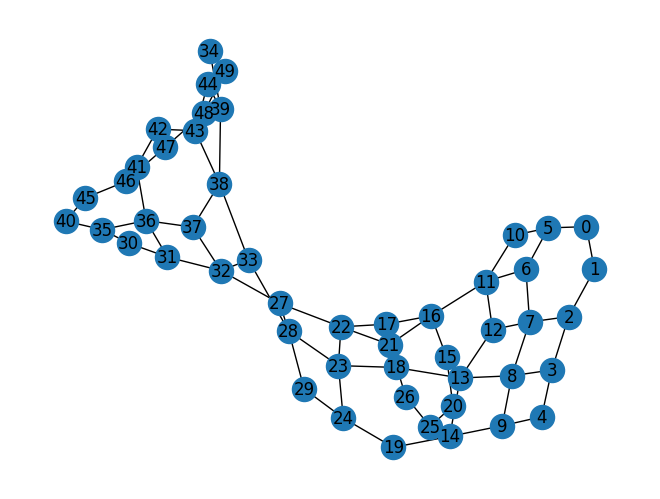

In [4]:
nx.draw(auxG,with_labels=True)

In [5]:
# labels of the node

for node in list(auxG.nodes())[0:5]:
    print(auxG.nodes[node])

{'isVisited': False}
{'isVisited': False}
{'isVisited': False}
{'isVisited': False}
{'isVisited': False}


In [6]:
# weights and labels of edges.

for edge in list(auxG.edges)[0:5]:
    print(edge, auxG.get_edge_data(*(edge)))

(0, 5) {'weights': 16, 'probability': 0.019443716334561736, 'color': -1}
(0, 1) {'weights': 8, 'probability': 0.02083242922337964, 'color': -1}
(5, 10) {'weights': 16, 'probability': 0.019443716334561736, 'color': -1}
(5, 6) {'weights': 32, 'probability': 0.01666629055692592, 'color': -1}
(1, 2) {'weights': 16, 'probability': 0.019443716334561736, 'color': -1}


## Scheduling 

In [7]:
from randomwalkscheduler import RandomWalkScheduler

import networkx as nx
import ast

In [8]:
edge_list = []
with open('./blueprints/1234.txt','r') as file:
    for line in file.readlines():
        edge_list.append(ast.literal_eval(line.strip()))


edges = edge_list

In [9]:
edges

[(0, 5),
 (0, 1),
 (5, 10),
 (5, 6),
 (1, 2),
 (2, 7),
 (2, 3),
 (7, 6),
 (7, 12),
 (7, 8),
 (3, 8),
 (3, 4),
 (8, 13),
 (8, 9),
 (4, 9),
 (9, 14),
 (10, 11),
 (6, 11),
 (11, 16),
 (11, 12),
 (12, 13),
 (13, 18),
 (13, 14),
 (14, 19),
 (16, 15),
 (16, 21),
 (16, 17),
 (18, 17),
 (18, 23),
 (19, 24),
 (15, 20),
 (20, 25),
 (21, 26),
 (21, 22),
 (17, 22),
 (22, 27),
 (22, 23),
 (23, 28),
 (23, 24),
 (24, 29),
 (25, 26),
 (27, 32),
 (27, 28),
 (28, 33),
 (28, 29),
 (32, 31),
 (32, 37),
 (32, 33),
 (33, 38),
 (30, 35),
 (30, 31),
 (35, 40),
 (35, 36),
 (31, 36),
 (36, 41),
 (36, 37),
 (37, 38),
 (38, 43),
 (38, 39),
 (34, 39),
 (39, 44),
 (40, 45),
 (41, 46),
 (41, 42),
 (43, 42),
 (43, 48),
 (43, 44),
 (44, 49),
 (45, 46),
 (46, 47),
 (42, 47),
 (47, 48),
 (48, 49)]

In [10]:
rws = RandomWalkScheduler(edges,n_labs=4)

In [11]:
# implementing edge coloring using Random walks
colored_graph = rws.make_colored_graph()

In [12]:
for edges in colored_graph.edges():
    print(edges,colored_graph.get_edge_data(*(edges))['color'])

(0, 5) 1
(0, 1) 2
(5, 10) 2
(5, 6) 3
(1, 2) 1
(10, 11) 1
(6, 7) 1
(6, 11) 2
(2, 7) 2
(2, 3) 3
(7, 12) 3
(7, 8) 2
(3, 8) 1
(3, 4) 2
(12, 11) 3
(12, 13) 1
(8, 13) 4
(8, 9) 3
(4, 9) 1
(13, 18) 2
(13, 14) 3
(9, 14) 2
(14, 19) 1
(11, 16) 4
(16, 15) 1
(16, 21) 3
(16, 17) 2
(18, 17) 1
(18, 23) 3
(19, 24) 3
(15, 20) 2
(21, 26) 1
(21, 22) 2
(17, 22) 3
(23, 22) 4
(23, 28) 4
(23, 24) 1
(24, 29) 2
(20, 25) 1
(25, 26) 2
(22, 27) 1
(27, 32) 2
(27, 28) 3
(28, 33) 2
(28, 29) 1
(32, 31) 4
(32, 37) 1
(32, 33) 3
(33, 38) 1
(31, 30) 1
(31, 36) 3
(37, 36) 2
(37, 38) 3
(38, 43) 4
(38, 39) 2
(30, 35) 2
(35, 40) 2
(35, 36) 1
(40, 45) 1
(36, 41) 4
(41, 46) 1
(41, 42) 2
(43, 42) 3
(43, 48) 1
(43, 44) 2
(39, 34) 1
(39, 44) 3
(44, 49) 1
(45, 46) 2
(46, 47) 3
(42, 47) 1
(48, 47) 2
(48, 49) 3


Edge coloring can be used for scheduling. Edges that of the same color can be contracted parallely without affecting others. For coloring the edges the traversal through the graph is done using Random walks. We have constructed a random walker who vist the nodes and colors all its edges.



Random Walker works in the following fashion:

  - Visit a node.  
  - Finds its edges.
  - color the edges using one of the colors in {1,2,3,4..degree of node}
  - Traverse to next node, while setting the flag isVisited = True in the current node.

Since it is random walk, the walker can return to the nodes once visited. If walker sees the flag isVisited = True. It will traverse to next node without coloring the current node.

In addition to this, the walker holds a short memory of the colors given to previous nodes. After coloring all the edges of the current node, walker check whether the current node and previous node have common neighbors. If there are common neighbors, walker will check whether corresponding edges have common color. If it has same colors, the walker will reset the edge of the current node with common neighbor into -1.  





Scheduling is done by carrying out coloring iteratively coupled with contraction of corresponding edges.

- Carry out coloring algorithm.
- Select edges to contract at current time slot (by default, those edges whose color=1 is selected for contraction). The number of edges selected depends upon the number of labs given as input.
- Contract the selected edges to produce a new graph. The Lab names and contracted edges are added to output dictionary as keys and values respectively. 
- Using the edges of the new graph, construct its auxillary graph and supply it into coloring algorithm routine.




### Creating a Schedule

In [13]:
from randomwalkscheduler import RandomWalkScheduler

import networkx as nx
import ast
import pandas as pd

C:\Users\navan\AppData\Local\Temp\ipykernel_15544\662742604.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [14]:
# Edges

edge_list = []
with open('./blueprints/1896.txt','r') as file:
    for line in file.readlines():
        edge_list.append(ast.literal_eval(line.strip()))


edges = edge_list

# scheduling
rws = RandomWalkScheduler(edges,n_labs=10)
schedule = rws.create_schedule()
schedule

{'time_slot-1': {'Labs_Allocated': ['Lab-1',
   'Lab-2',
   'Lab-3',
   'Lab-4',
   'Lab-5',
   'Lab-6',
   'Lab-7',
   'Lab-8',
   'Lab-9',
   'Lab-10'],
  'Edges_To_Combine': [(0, 1),
   (5, 10),
   (2, 7),
   (11, 12),
   (3, 4),
   (8, 13),
   (9, 14),
   (15, 20),
   (16, 21),
   (18, 23)]},
 'time_slot-2': {'Labs_Allocated': ['Lab-1',
   'Lab-2',
   'Lab-3',
   'Lab-4',
   'Lab-5',
   'Lab-6',
   'Lab-7',
   'Lab-8',
   'Lab-9'],
  'Edges_To_Combine': [(6, '2_t1*'),
   (19, '9_t1*'),
   ('18_t1*', 28),
   (22, '16_t1*'),
   (27, 26),
   (29, 34),
   (25, 30),
   ('15_t1*', '5_t1*'),
   (31, 32)]},
 'time_slot-3': {'Labs_Allocated': ['Lab-10',
   'Lab-1',
   'Lab-2',
   'Lab-3',
   'Lab-4',
   'Lab-5',
   'Lab-6',
   'Lab-7',
   'Lab-8'],
  'Edges_To_Combine': [('0_t1*', '15_t2*'),
   ('6_t2*', '11_t1*'),
   (17, '18_t2*'),
   ('8_t1*', '3_t1*'),
   ('22_t2*', '27_t2*'),
   (24, '29_t2*'),
   (33, 38),
   (35, '25_t2*'),
   (40, 45)]},
 'time_slot-4': {'Labs_Allocated': ['Lab-9',


In [15]:
df = pd.DataFrame.from_dict(schedule,orient='index')
df

,Labs_Allocated,Edges_To_Combine
time_slot-1,"[Lab-1, Lab-2, Lab-3, Lab-4, Lab-5, Lab-6, Lab...","[(0, 1), (5, 10), (2, 7), (11, 12), (3, 4), (8..."
time_slot-2,"[Lab-1, Lab-2, Lab-3, Lab-4, Lab-5, Lab-6, Lab...","[(6, 2_t1*), (19, 9_t1*), (18_t1*, 28), (22, 1..."
time_slot-3,"[Lab-10, Lab-1, Lab-2, Lab-3, Lab-4, Lab-5, La...","[(0_t1*, 15_t2*), (6_t2*, 11_t1*), (17, 18_t2*..."
time_slot-4,"[Lab-9, Lab-10, Lab-1, Lab-2, Lab-3, Lab-4, La...","[(19_t2*, 17_t3*), (24_t3*, 39), (31_t2*, 25_t..."
time_slot-5,"[Lab-7, Lab-8, Lab-9, Lab-10, Lab-1, Lab-2, La...","[(8_t3*, 19_t4*), (0_t4*, 22_t3*), (33_t3*, 43..."
time_slot-6,"[Lab-4, Lab-5, Lab-6, Lab-7]","[(31_t4*, 36_t5*), (0_t5*, 8_t5*), (47, 40_t5*..."
time_slot-7,"[Lab-8, Lab-9]","[(33_t5*, 47_t6*), (31_t6*, 0_t6*)]"
time_slot-8,[Lab-10],"[(24_t6*, 33_t7*)]"
time_slot-9,[Lab-1],"[(31_t7*, 24_t8*)]"


#### Note - Naming of nodes
contracting nodes (u,v) => name of new node = __u_tn*__ 

_tn*_ inidicates contracted in $n^{th}$ time slot 

In [16]:
import sys
import networkx

# Prepare the data
data = [
    ["Library", "Version"],
    ["NetworkX", networkx.__version__],
    ["Python", sys.version.split()[0]]
]

# Create a markdown table
table_md = "| Library   | Version   |\n|-----------|-----------|\n"
for row in data[1:]:
    table_md += f"| {row[0]}   | {row[1]}   |\n"

# Display the markdown table
from IPython.display import display, Markdown
display(Markdown(table_md))

| Library   | Version   |
|-----------|-----------|
| NetworkX   | 3.2.1   |
| Python   | 3.11.7   |
